In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt





In [5]:
# Chargement et normalisation des données 
df = pd.read_csv("farms_train.csv", delimiter=",")  
X = df.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

C:\Users\pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:

n_variables = X_scaled.shape[1]
acp = PCA(n_components=n_variables)
acp.fit(X_scaled)

,n_components,7
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


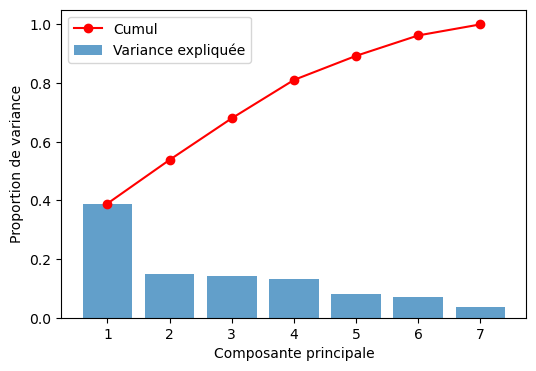

In [7]:
# Afficher la variance expliquée
plt.figure(figsize=(6,4))
plt.bar(np.arange(1, n_variables+1), acp.explained_variance_ratio_, alpha=0.7, label="Variance expliquée")
plt.plot(np.arange(1, n_variables+1), np.cumsum(acp.explained_variance_ratio_), marker='o', color='red', label="Cumul")
plt.xlabel("Composante principale")
plt.ylabel("Proportion de variance")
plt.legend()
plt.show()

In [8]:
# Pour les corrélation variables-axes (corvar)
var_cor = acp.explained_variance_
var_cor_rac = np.sqrt(var_cor)
corvar = np.zeros((n_variables, acp.components_.shape[0]))
for k in range(acp.components_.shape[0]):
    corvar[:, k] = acp.components_[k, :] * var_cor_rac[k]
print("Matrice des corrélations variables/facteurs :")
print(corvar)

Matrice des corrélations variables/facteurs :
[[ 8.17879281e-01 -5.14628894e-02  3.92512454e-02 -5.25213354e-02
   2.35541251e-01  4.64330008e-01 -2.35677458e-01]
 [ 8.62059537e-01  6.05653197e-02 -6.15719574e-03  1.91082259e-01
  -2.03847611e-01  1.85995057e-01  3.78136016e-01]
 [-7.23160530e-01 -2.15925132e-01  1.39533577e-01 -4.18636648e-01
   3.29554566e-01  2.68901757e-01  2.39321033e-01]
 [-1.72070725e-02  7.98246007e-01 -3.96885822e-01 -4.48245577e-01
  -5.03063623e-02  6.32500126e-02  5.78639485e-03]
 [-4.71987214e-01  2.74645366e-01 -3.36222482e-01  6.83346714e-01
   3.30111783e-01  1.16238817e-01  4.24788288e-02]
 [-4.44208161e-02  5.28743098e-01  8.35437054e-01  1.24008247e-01
   8.46009820e-02 -2.16048125e-02  5.63660234e-04]
 [ 7.55742518e-01  7.71115428e-04 -7.18510535e-02 -1.37855425e-01
   5.02957388e-01 -3.84593538e-01  7.94206283e-02]]


In [9]:
# PCA avec nombre optimal de composantes
n_variables = X_scaled.shape[1]
pca = PCA(n_components=n_variables)
pca.fit(X_scaled)

,n_components,7
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [10]:
# Coordonnées des individus sur les deux premières composantes principales
ind_coords = pca.transform(X_scaled)[:, :2]


In [16]:
# Cercle des corrélations : corrélation variables - composantes principales
var_cor = pca.explained_variance_
var_cor_rac = np.sqrt(var_cor)
corvar = np.zeros((n_variables, 2))
for k in range(2):
    corvar[:, k] = pca.components_[k, :] * var_cor_rac[k]

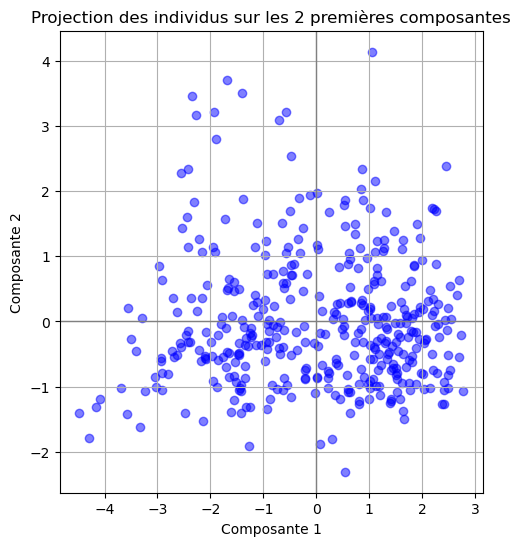

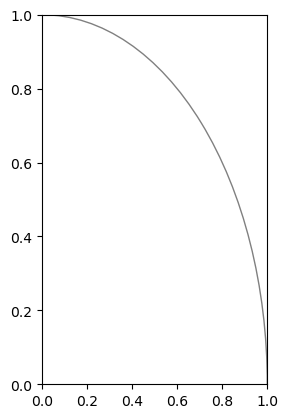

In [18]:
# Tracé du cercle des corrélations
plt.subplot(1, 2, 2)
circle = plt.Circle((0,0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)


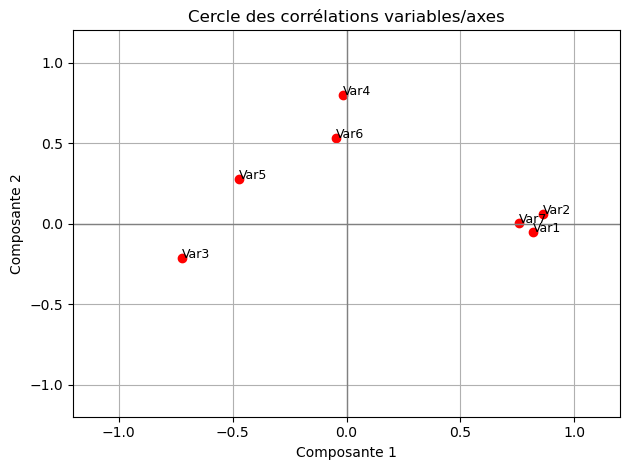

In [14]:
# projection des variables sur le cercle
plt.scatter(corvar[:,0], corvar[:,1], color='red')

for i in range(n_variables):
    plt.text(corvar[i, 0], corvar[i, 1], f"Var{i+1}", fontsize=9)

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.title("Cercle des corrélations variables/axes")
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.grid(True)
plt.tight_layout()

plt.show()



<Axes: >

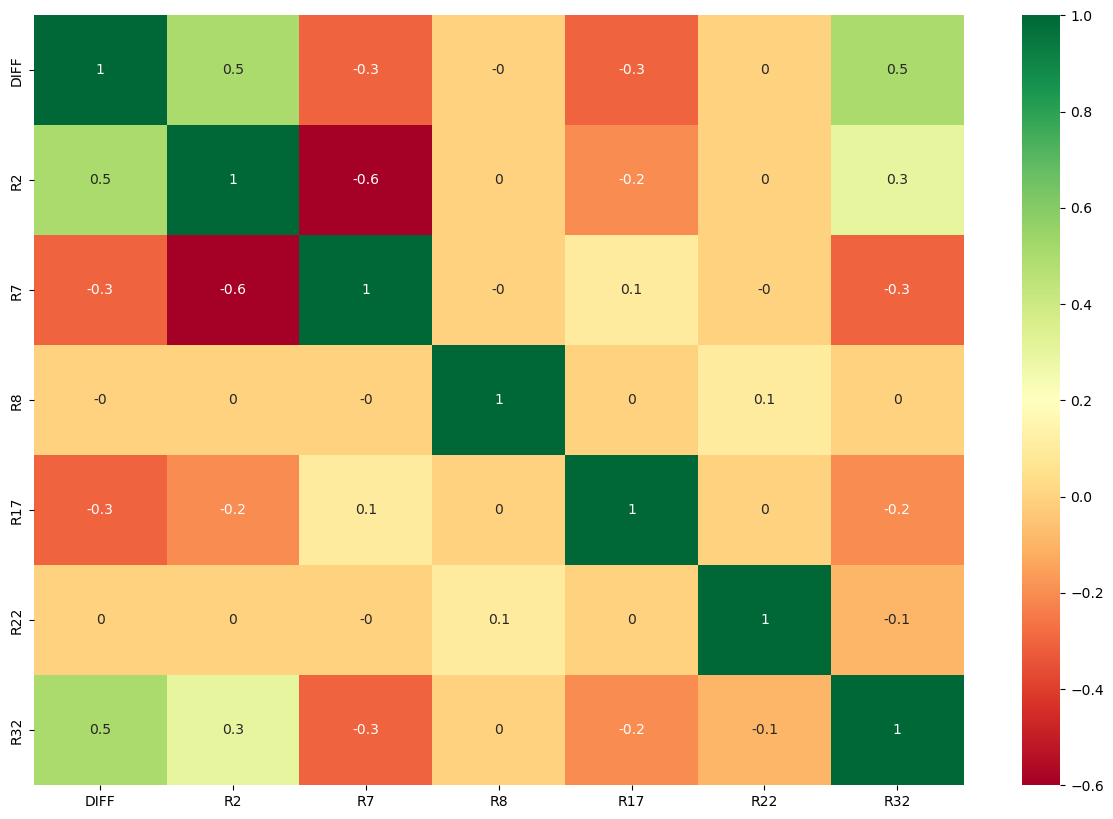

In [29]:
sns.heatmap(round(df.corr(method='kendall'),1), annot=True,cmap='RdYlGn') # heatmap via sns

In [22]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import kendalltau, spearmanr, chi2_contingency, ttest_ind, bartlett
from pandas.plotting import scatter_matrix
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.decomposition import PCA
from sklearn import metrics
!pip install fanalysis
!pip install --user mca
from mca import MCA 
from mca import MCA
from fanalysis.mca import MCA as f_mca
from fanalysis.ca import CA
!pip install prince
from prince import CA, MCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [24]:
type(X)

numpy.ndarray

In [30]:
def stat_des_uni(var):
    freq = pd.value_counts(df[var])
    print(freq.sort_index())
    modal = freq.index
    freqAbs = freq.values
    plt.bar(modal, freqAbs)
    print(df[var].describe());

C:\Users\pc\AppData\Local\Temp\ipykernel_16256\632751284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(df[var])


R22
0.06099    1
0.07663    1
0.08913    1
0.08989    1
0.09574    1
          ..
3.08120    1
3.30770    1
3.61670    1
3.86630    1
3.93970    6
Name: count, Length: 366, dtype: int64
count    401.000000
mean       0.705929
std        0.671149
min        0.060990
25%        0.313000
50%        0.526300
75%        0.863100
max        3.939700
Name: R22, dtype: float64
R17
0.0120     1
0.0186     1
0.0202    16
0.0219     1
0.0226     1
          ..
0.1100     1
0.1140    11
0.1210     1
0.1240     9
0.1940     1
Name: count, Length: 287, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_16256\632751284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(df[var])


count    401.000000
mean       0.064341
std        0.026580
min        0.012000
25%        0.044900
50%        0.061200
75%        0.081700
max        0.194000
Name: R17, dtype: float64
R7
0.0513     1
0.0695    13
0.0754     1
0.0757     1
0.0812     1
          ..
2.1520     1
2.2960     1
2.4290     1
2.4760     1
2.5570     5
Name: count, Length: 326, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_16256\632751284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(df[var])


count    401.000000
mean       0.648469
std        0.474321
min        0.051300
25%        0.317000
50%        0.555000
75%        0.872000
max        2.557000
Name: R7, dtype: float64


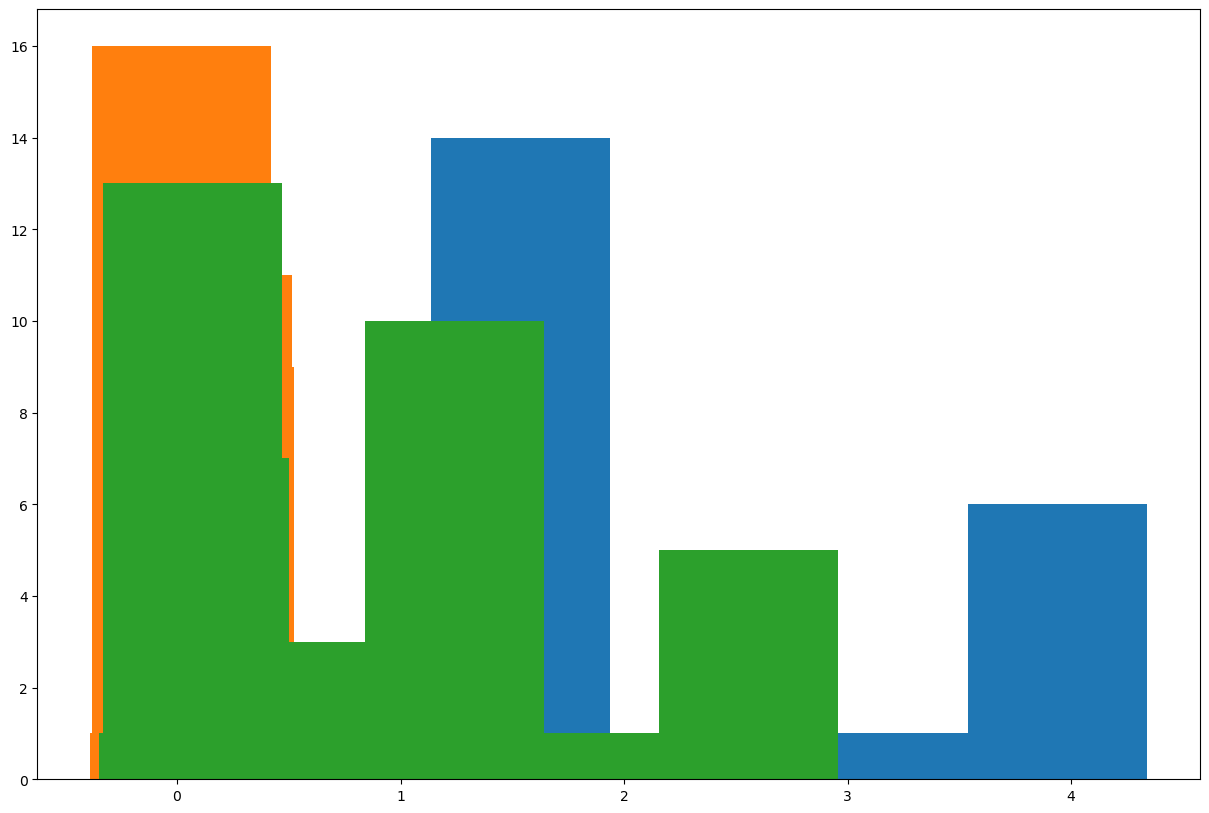

In [33]:
stat_des_uni('R22')
stat_des_uni('R17')
stat_des_uni('R7')

C:\Users\pc\AppData\Local\Temp\ipykernel_16256\632751284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(df[var])


R32
-0.1620    1
-0.0979    8
-0.0787    1
-0.0656    1
-0.0528    1
          ..
 0.4631    1
 0.4773    1
 0.4816    1
 0.5626    1
 0.6608    1
Name: count, Length: 348, dtype: int64
count    401.000000
mean       0.249785
std        0.130242
min       -0.162000
25%        0.167800
50%        0.269600
75%        0.337300
max        0.660800
Name: R32, dtype: float64
R2
0.0000    55
0.0352     1
0.0394     1
0.0413     1
0.0711     1
          ..
0.9370     2
0.9390     1
0.9400     7
0.9420     1
0.9500    13
Name: count, Length: 276, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_16256\632751284.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq = pd.value_counts(df[var])


count    401.000000
mean       0.522449
std        0.302731
min        0.000000
25%        0.298000
50%        0.599000
75%        0.759000
max        0.950000
Name: R2, dtype: float64


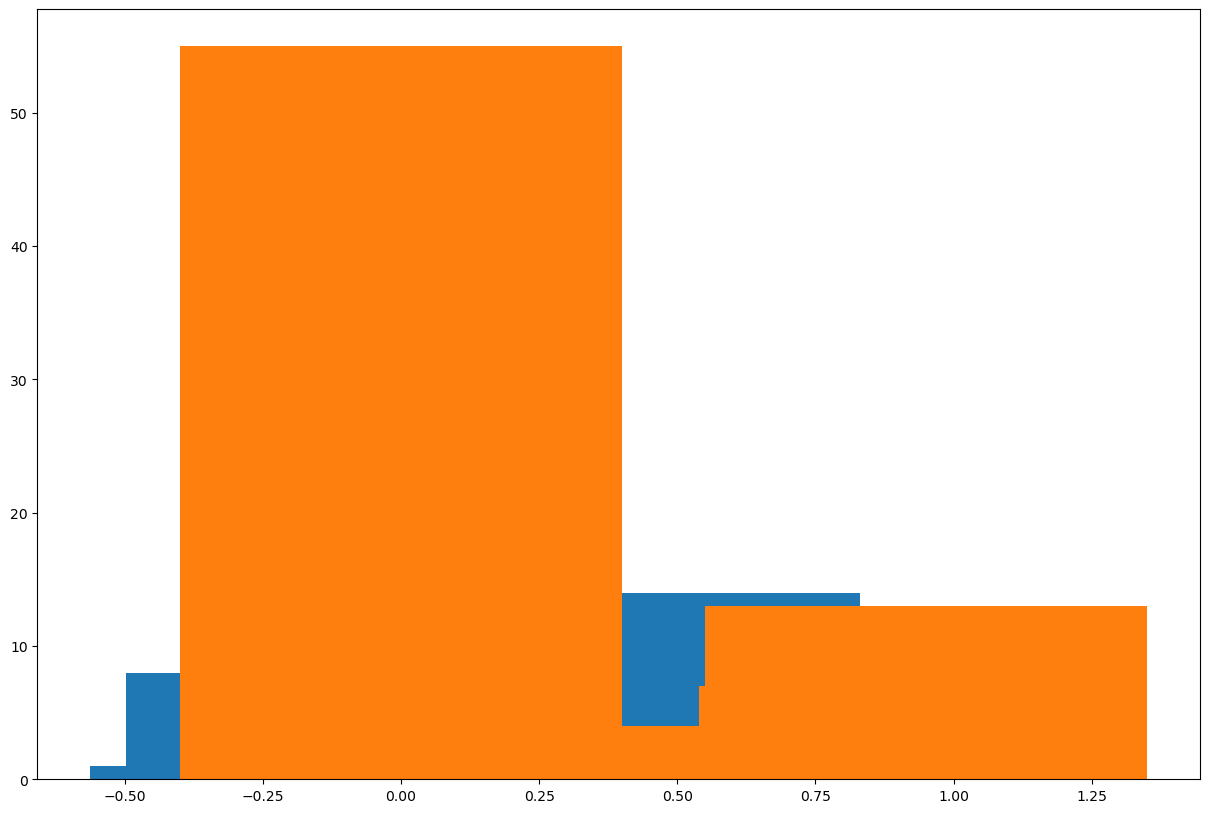

In [34]:
stat_des_uni('R32')
stat_des_uni('R2')

<Axes: xlabel='R22', ylabel='R7'>

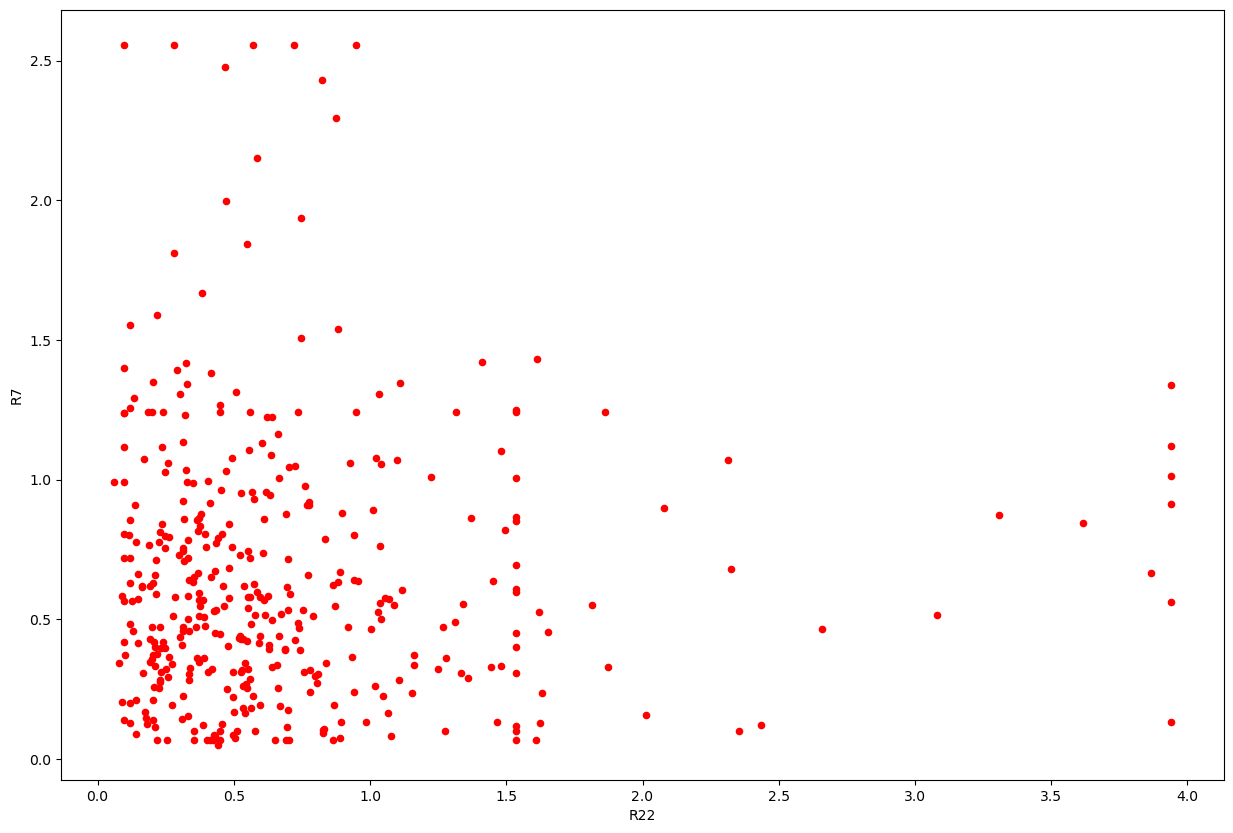

In [36]:
df.plot.scatter(x='R22',y='R7',c='red')